In [26]:
!pip install -q ipeadatapy

In [27]:
import warnings
import ipeadatapy as ipeadata
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

warnings.simplefilter('ignore')

In [28]:
df_brent = ipeadata.timeseries('EIA366_PBRENT366')

In [29]:
df_brent.sort_values(by=['DATE'], ascending=True, inplace=True)
df_brent.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN


In [30]:
df_brent.columns

Index(['CODE', 'RAW DATE', 'DAY', 'MONTH', 'YEAR', 'VALUE (US$)'], dtype='object')

In [31]:
df_brent[df_brent['VALUE (US$)'].isnull()]

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN
...,...,...,...,...,...,...
2019-03-10,EIA366_PBRENT366,2019-03-10T00:00:00-03:00,10,3,2019,NaN
2019-03-16,EIA366_PBRENT366,2019-03-16T00:00:00-03:00,16,3,2019,NaN
2019-03-17,EIA366_PBRENT366,2019-03-17T00:00:00-03:00,17,3,2019,NaN


<Axes: xlabel='DATE'>

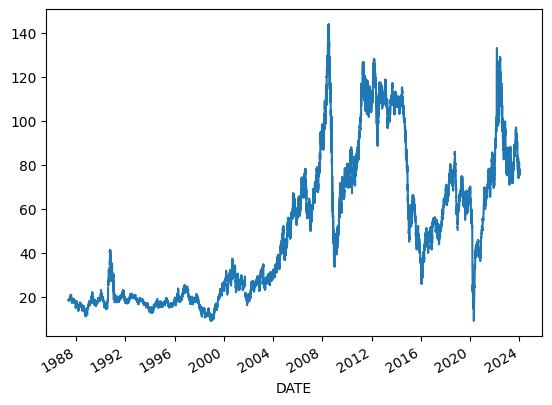

In [32]:
df_brent['VALUE (US$)'].plot()

In [33]:
df_dow_jones = ipeadata.timeseries('GM366_DOW366')
df_dow_jones.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (-)
DATE,,,,,,
1900-01-02,GM366_DOW366,1900-01-02T00:00:00-02:00,2,1,1900,68.13
1900-01-02,GM366_DOW366,1900-01-02T00:00:00-02:00,2,1,1900,68.13
1900-01-03,GM366_DOW366,1900-01-03T00:00:00-02:00,3,1,1900,66.61
1900-01-03,GM366_DOW366,1900-01-03T00:00:00-02:00,3,1,1900,66.61
1900-01-04,GM366_DOW366,1900-01-04T00:00:00-02:00,4,1,1900,67.15


In [34]:
df_nasdaq = ipeadata.timeseries('SGS366_NASDAQ366')
df_nasdaq.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (-)
DATE,,,,,,
1971-02-05,SGS366_NASDAQ366,1971-02-05T00:00:00-02:00,5,2,1971,100.00
1971-02-06,SGS366_NASDAQ366,1971-02-06T00:00:00-02:00,6,2,1971,NaN
1971-02-07,SGS366_NASDAQ366,1971-02-07T00:00:00-02:00,7,2,1971,NaN
1971-02-08,SGS366_NASDAQ366,1971-02-08T00:00:00-02:00,8,2,1971,100.84
1971-02-09,SGS366_NASDAQ366,1971-02-09T00:00:00-02:00,9,2,1971,100.76


In [35]:
data_base = df_brent[df_brent['VALUE (US$)'].isnull() == False].first('1D').index.strftime('%Y-%m-%d').values[0]
data_base

'1987-05-20'

## equalizando a data base nos dataframes

In [36]:
# data_base = '1987-05-20'
df_dow_jones = df_dow_jones.loc[df_dow_jones.index >= data_base]
df_nasdaq = df_nasdaq[df_nasdaq.index >= data_base]
df_brent = df_brent[df_brent.index >= data_base]

## remove registros duplicados

In [37]:
df_dow_jones.drop_duplicates(inplace=True)
df_nasdaq.drop_duplicates(inplace=True)
df_brent.drop_duplicates(inplace=True)

In [38]:
display(df_dow_jones.shape)
display(df_nasdaq.shape)
display(df_brent.shape)

(12461, 6)

(12463, 6)

(12853, 6)

In [47]:
s_dow_jones = pd.Series(df_dow_jones['VALUE (-)'])
s_dow_jones.name = 'value_dow_jones'
s_dow_jones.fillna(method='ffill', inplace=True)

In [48]:
s_nasdaq = pd.Series(df_nasdaq['VALUE (-)'])
s_nasdaq.name = 'value_nasdaq'
s_nasdaq.fillna(method='ffill', inplace=True)

In [40]:
s_brent = pd.Series(df_brent['VALUE (US$)'])
s_brent.fillna(method='ffill', inplace=True)
s_brent.name = 'value_brent'

In [41]:
pd.DataFrame(s_brent).merge(s_dow_jones, on='DATE', how='left').isnull().value_counts()

value_brent  value_dow_jones
False        False              12435
             True                 418
dtype: int64

In [42]:
pd.DataFrame(s_brent).merge(s_dow_jones, on='DATE', how='left').fillna(method='ffill').isnull().value_counts()

value_brent  value_dow_jones
False        False              12853
dtype: int64

In [49]:
df = pd.DataFrame(s_brent).merge(s_dow_jones, on='DATE', how='left').fillna(method='ffill')
df = df.merge(s_nasdaq, on='DATE', how='left').fillna(method='ffill')
df.head()

,value_brent,value_dow_jones,value_nasdaq
DATE,,,
1987-05-20,18.63,2215.87,406.57
1987-05-21,18.45,2225.77,408.47
1987-05-22,18.55,2243.20,407.40
1987-05-23,18.55,2243.20,407.40
1987-05-24,18.55,2243.20,407.40


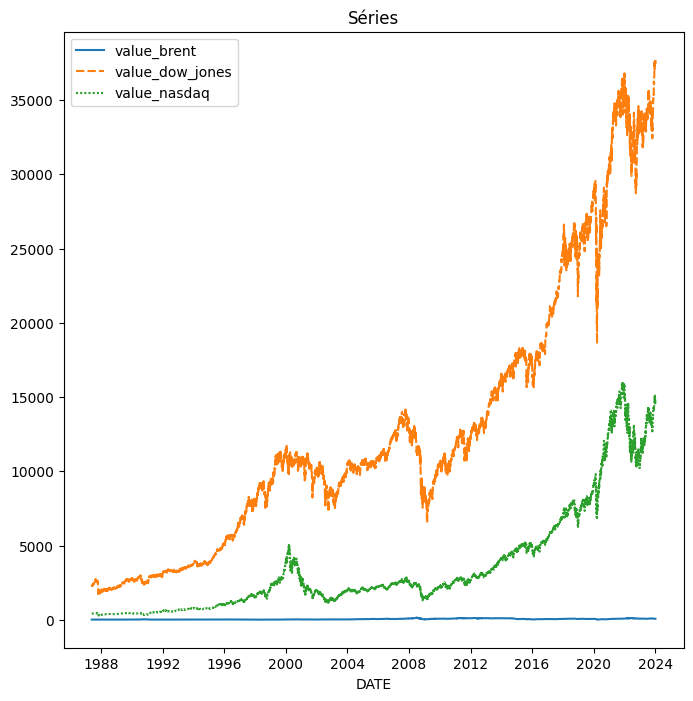

### Como observado no gráfico acima será necessário normalizar os dados 


In [59]:
plt.figure(figsize=(8,8),)
sb.lineplot(df)
plt.title('Séries')
plt.show()

print('### Como observado no gráfico acima será necessário normalizar os dados ')

## normalizando os dados

In [61]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [72]:
df_normalized = pd.DataFrame(index=df.index,)
for column in list(df.columns):
  df_normalized[column] = min_max_scaler.fit_transform(df[[column]])

df_normalized.head()

,value_brent,value_dow_jones,value_nasdaq
DATE,,,
1987-05-20,0.070671,0.013262,0.007275
1987-05-21,0.069336,0.013538,0.007395
1987-05-22,0.070078,0.014022,0.007327
1987-05-23,0.070078,0.014022,0.007327
1987-05-24,0.070078,0.014022,0.007327


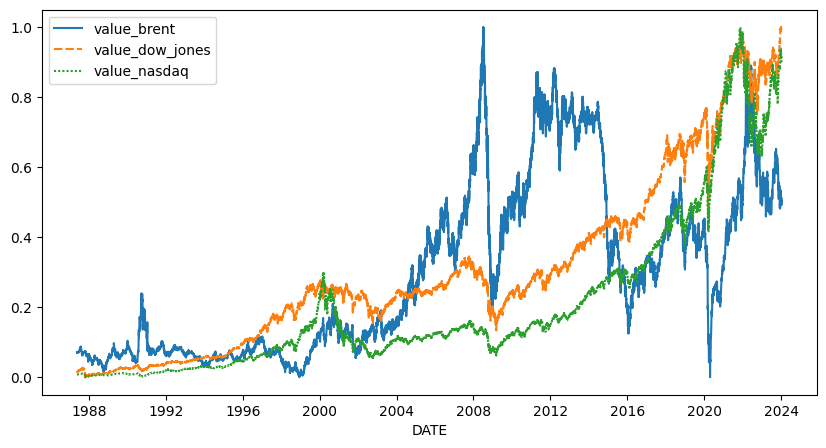

In [74]:
plt.figure(figsize=(10, 5),)
sb.lineplot(df_normalized,)
plt.show()

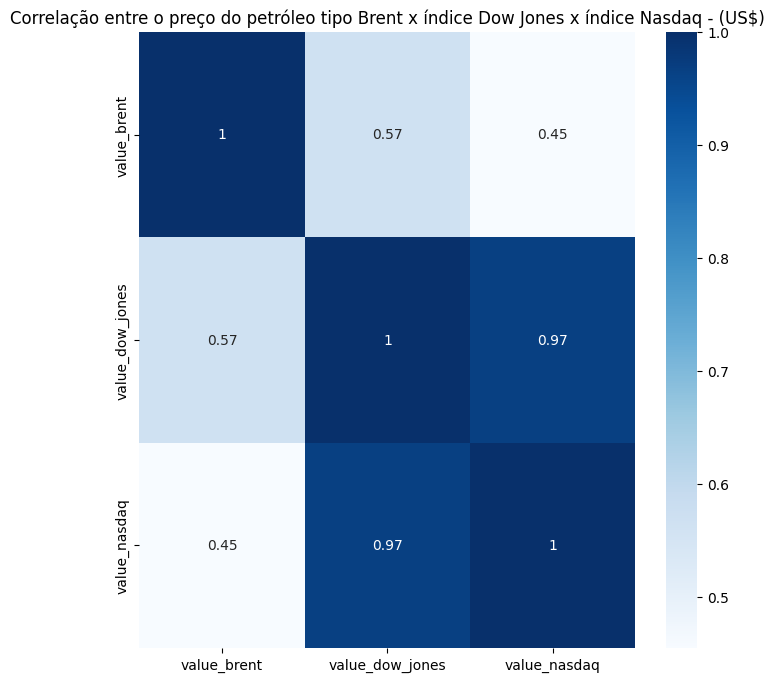

In [75]:
plt.figure(figsize=(8, 8),)
sb.heatmap(df_normalized.corr(), cmap='Blues', annot=True,)
plt.title('Correlação entre o preço do petróleo tipo Brent x índice Dow Jones x índice Nasdaq - (US$)')
plt.show()